**box plot**

- box plot is used to identify the outliers

- outlier is an observation having huge postive value or huge negative value 

- Q1=25p ,Q2=50 and Q3=75p

- IQR = Inter quartile range = Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [7]:
types=dict(visa_df.dtypes)
cat_columns=[keys for keys,values in types.items() if values=='object']
num_columns=[keys for keys,values in types.items() if values!='object']
cat_columns

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [8]:
num_columns

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [9]:
visa_df.prevailing_wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

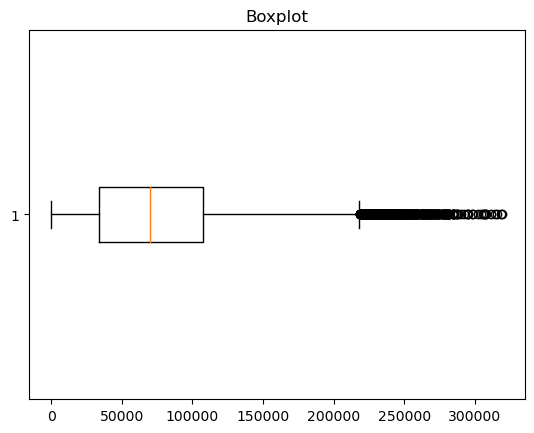

In [10]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.show()

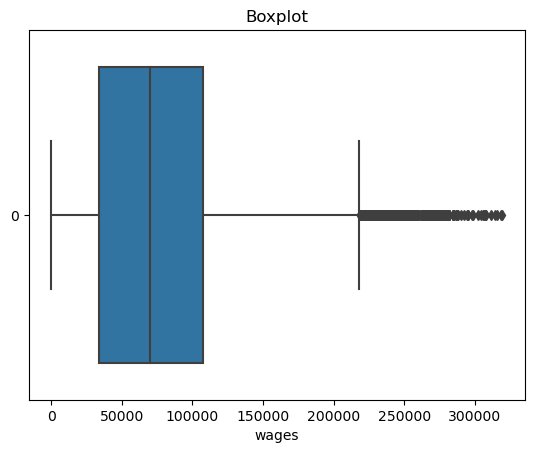

In [11]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

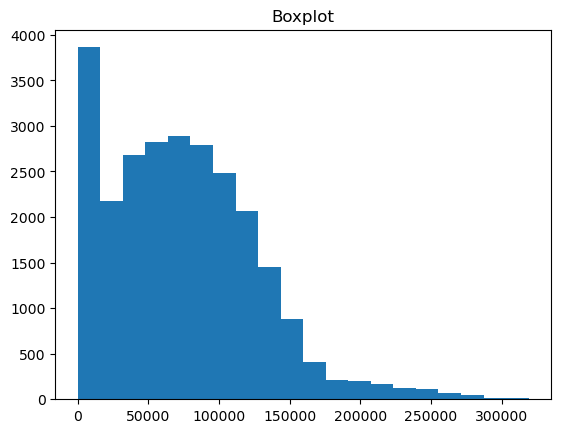

In [12]:
wage_data=visa_df['prevailing_wage']
plt.hist(wage_data,bins=20)
plt.title('Boxplot')

plt.show()

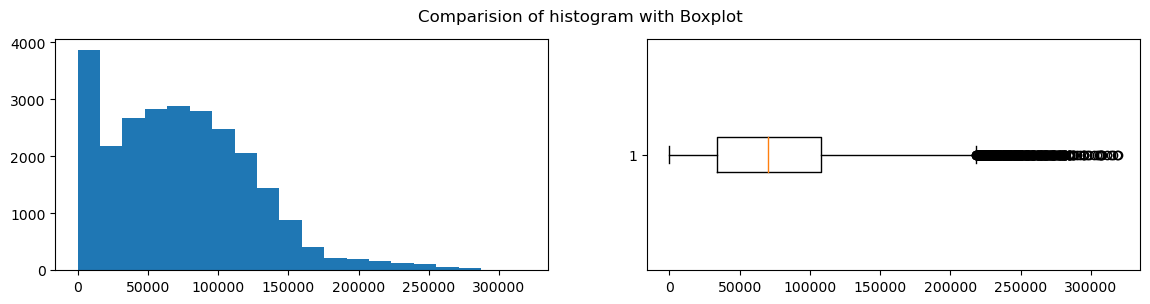

In [13]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)

plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel=("boxplot")
plt.show()

**Finding the outliers**
- we already know that outliers available less than Q1-1.5*IQR and Q3+1.5IQR and
- step :-1
    - calculate Q1=25p
    - calculate Q2=50p
    - calculate Q3=75p
- step :-2
        - calculate IQR=Q3-Q1
- step :- 3
    - calculate LB=Q1-1.5*IQR
    - CALCULATE UB=Q3+1.5*IQR
- step :-4
    - con1= wage data<LB
    - con2 =wage data >UB
    - con3= con1 or - and con2(use bitwise operator )
- step - 5 :data[con3]
    
    

In [14]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step2
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3= con1|con2
#whenever you seen the true and false use bitwise operator means compare true or false use bitwise operator 
# bitwise operator used to compare 
# bits data == 0 and 1 == true false 
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [15]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [16]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step2
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data>lb
con2=wage_data<ub
con3= con1&con2
#whenever you seen the true and false use bitwise operator means compare true or false use bitwise operator 
# bitwise operator used to compare 
# bits data == 0 and 1 == true false 
non_outliers_data=wage_data[con3]
non_outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

In [17]:
non_outliers_data=visa_df[con3]
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe 
- visa_df : total data 25480
- non_outliers_df= after removing outliers 25053
- first plot non outliers data prevaling wage histogram and box plot

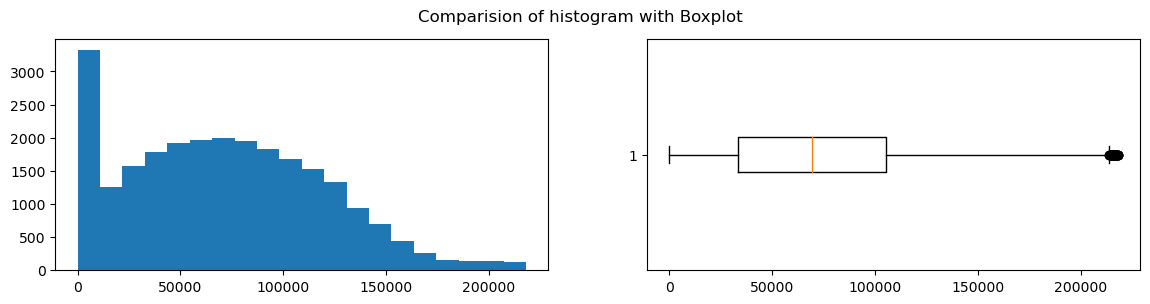

In [18]:
wage_data_non_ouliers_df=non_outliers_data['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data_non_ouliers_df,bins=20)
plt.subplot(1,2,2)
plt.boxplot(wage_data_non_ouliers_df,vert=False)
plt.show()

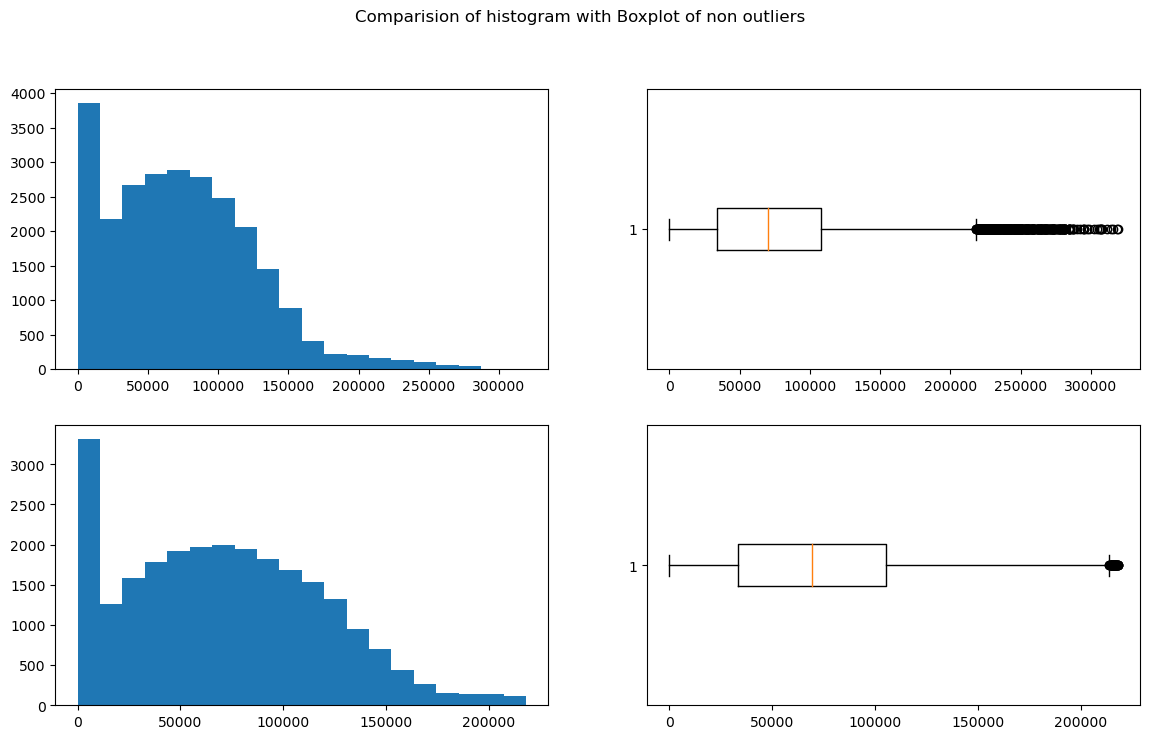

In [19]:
###################### data #########################
wage_data=visa_df['prevailing_wage']
wage_data_non_ouliers_df=non_outliers_data['prevailing_wage']
##################### entire data ######################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(2,2,1)
plt.hist(wage_data,bins=20)
plt.subplot(2,2,2)
plt.boxplot(wage_data,vert=False)
##################### non outliers #######################
plt.suptitle('Comparision of histogram with Boxplot of non outliers')
plt.subplot(2,2,3)
plt.hist(wage_data_non_ouliers_df,bins=20)
plt.subplot(2,2,4)
plt.boxplot(wage_data_non_ouliers_df,vert=False)

plt.show()

In [17]:
# fill the outliers of wage data with wage median
#427 outliers 
# 427 should replace with meadian value 
#again draw the plots 

In [20]:
outliers_df1=visa_df[con3].median()
outliers_df1

C:\Users\SURAJ KHILLARE\AppData\Local\Temp\ipykernel_23524\2538860717.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  outliers_df1=visa_df[con3].median()


no_of_employees     2111.00
yr_of_estab         1997.00
prevailing_wage    69121.75
dtype: float64

In [21]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step2
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3= con1|con2
#whenever you seen the true and false use bitwise operator means compare true or false use bitwise operator 
# bitwise operator used to compare 
# bits data == 0 and 1 == true false 
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [22]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step2
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data>lb
con2=wage_data<ub
con3= con1&con2
#whenever you seen the true and false use bitwise operator means compare true or false use bitwise operator 
# bitwise operator used to compare 
# bits data == 0 and 1 == true false 
non_outliers_data=wage_data[con3]
non_outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

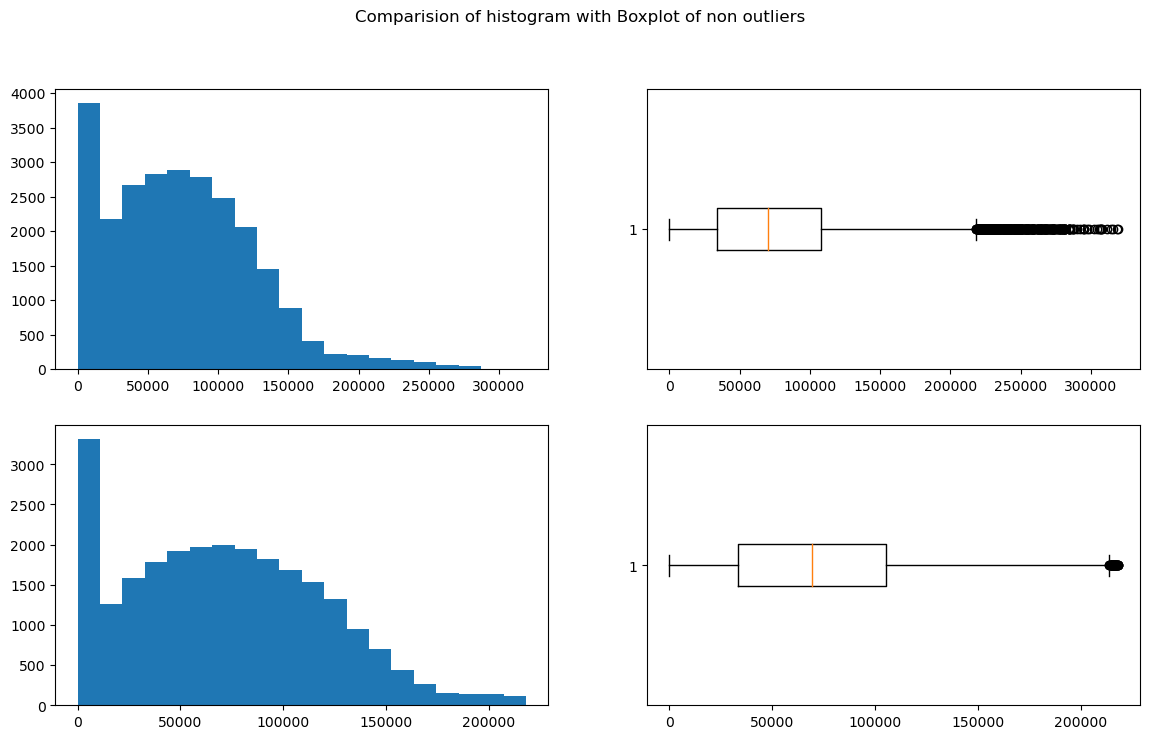

In [24]:
###################### data #########################
wage_data=visa_df['prevailing_wage']
wage_data_non_ouliers_df=non_outliers_data[con3]
##################### entire data ######################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(2,2,1)
plt.hist(wage_data,bins=20)
plt.subplot(2,2,2)
plt.boxplot(wage_data,vert=False)
##################### non outliers #######################
plt.suptitle('Comparision of histogram with Boxplot of non outliers')
plt.subplot(2,2,3)
plt.hist(wage_data_non_ouliers_df,bins=20)
plt.subplot(2,2,4)
plt.boxplot(wage_data_non_ouliers_df,vert=False)

plt.show()

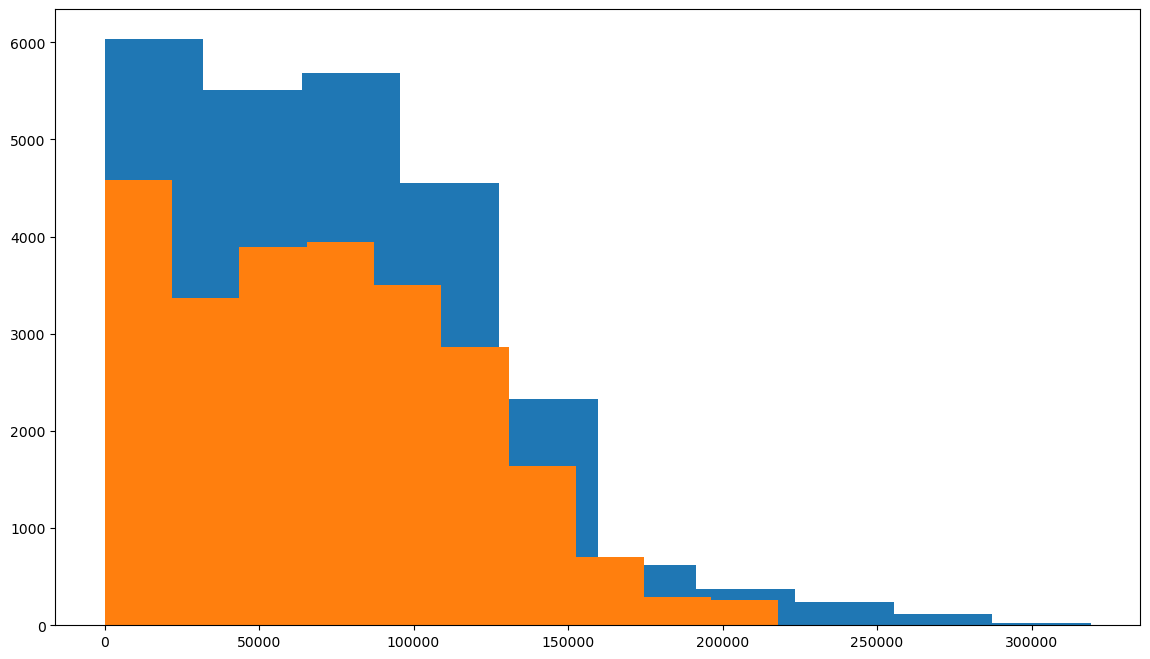

In [26]:
wage_data_non_ouliers_df=non_outliers_data[con3]
wage_data=visa_df['prevailing_wage']

##################### entire data ######################
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_ouliers_df)
plt.show()

In [22]:
visa_df.prevailing_wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

**how to deal outliers**
- 1. we can drop the outliers 
    - droping outliers is an easy task , but not recomended
    - if you drop the outliers we are droping the rows 
    - which means we are droping the other columns values also 
    - may be some important information we maight loose from other columns values 
    - but in industry if outliear percentage less than 2% of the total data, we can drop 
    - the number of outliers in pwage is 427
    - the number of total observations are 25480
    - the percentage is 1.67 which less than 2%
    
- 2. fill with median value 
    - we already know that outliers does not affect by median 
    - so it is the best practice to fill the outliers with median 
    
- 3. capping or florring 
    - instead of fill with median 
    - we can fill with certain values 
    - the outliers which are less than LB value
    - the outliers which are greater than UB  value 
    
- **isolation forest**

    - is ML model used to find the outliers and anamolies 
    

**filled with median value**

In [30]:
wage_data=visa_df['prevailing_wage']
list1=[]
for value in wage_data:
    if value < lb or value > ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)
list1

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

**np.where**

- in numpy we have method called where
- it takes three arguments
    - 1. condition 
    - 2. values if condition is True 
    - 3. values if condition is False
- it is applicable for only Binary means if and else

In [40]:
dict1={'Sub':['DS','DF','CS'],
   'marks':[100,200,300]}
df1=pd.DataFrame(dict1)
df1

,Sub,marks
0,DS,100
1,DF,200
2,CS,300


In [ ]:
# qn : i want replace marks with 1 ,which are grether than 100

In [46]:

l=[]
for i in df1.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df1["marks"]=l
df1

,Sub,marks
0,DS,100
1,DF,1
2,CS,1


In [51]:
#np.where(<condition>,<True>,<False>)
con=df1["marks"]>100
l=np.where(con,1,df1["marks"])
df1['marks']=1
df1

,Sub,marks
0,DS,1
1,DF,1
2,CS,1


In [54]:
#implement for the outliers
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con=con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [55]:
visa_df['prevailing_wage_update']=l


(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

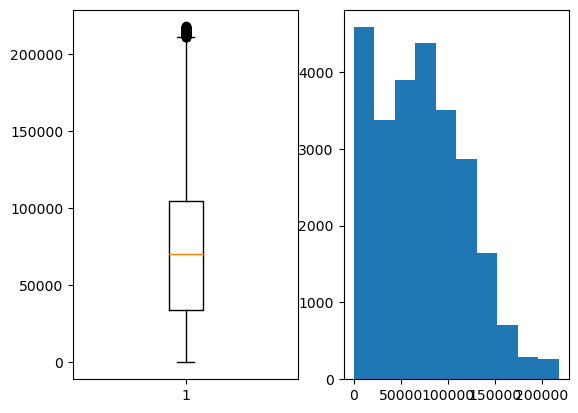

In [59]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])

In [60]:
lb

-76564.56875000002

In [61]:
wage_med

70308.20999999999

In [68]:
col5=['prevailing_wage','prevailing_wage_update']
visa_df["prevailing_wage"].compare(visa_df["prevailing_wage_update"])

,self,other
14,220081.73,70308.21
34,225569.73,70308.21
130,247393.01,70308.21
216,269321.68,70308.21
221,219529.62,70308.21
...,...,...
25191,280482.51,70308.21
25195,234308.77,70308.21
25468,272715.74,70308.21
25469,273772.47,70308.21


In [31]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
